# fastf1 JupyterLite Demo

Demo of using `fastf1` in JupyterLite in-browser WASM Pyhton environments.

In [2]:
# Rapidfuzz wheel originally available from:
# https://github.com/rapidfuzz/RapidFuzz/issues/423
# The home path (given by %pwd) is: /drive

# Pyodide kernel
import micropip
await micropip.install("emfs:/drive/packages/rapidfuzz-3.11.0-cp312-cp312-pyodide_2024_0_wasm32.whl")

%pip install jupyterlite-simple-cors-proxy fastf1

In [3]:
from jupyterlite_simple_cors_proxy.fastf1_proxy import fastf1_cors_proxy
import fastf1

In [4]:
# Then enable CORS proxy without debug logging
# TO DO - aonly apply this is if emscripten
fastf1_cors_proxy(
    domains=["api.formula1.com", "livetiming.formula1.com"],
    # debug=True,
    # By default, the proxy path is:
    # https://api.allorigins.win/raw?url=
    # Or we can specify our own:
    proxy_url="https://corsproxy.io/",
)

# Create a cache dir
import os
CACHE_DIR = "/fastf1cache"
if not os.path.exists(CACHE_DIR):
    os.mkdir(CACHE_DIR)

# If we have previously created and stashed a cache dir:
# import shutil
# PERSISTED_CACHE_DIR = "/drive/fasff1cache"
# shutil.copytree(PERSISTED_CACHE_DIR, CACHE_DIR)
# Stash cachedir as:
# shutil.copytree(CACHE_DIR, PERSISTED_CACHE_DIR)

fastf1.Cache.enable_cache(CACHE_DIR)

In [5]:
# Now use FastF1 as normal
session = fastf1.get_session(2019, 'Bahrain', 'Q')

In [6]:
session.load(telemetry=False, laps=True, weather=False)

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

In [7]:
session.get_driver('VET')

DriverNumber                               5
BroadcastName                       S VETTEL
Abbreviation                             VET
DriverId                              vettel
TeamName                             Ferrari
TeamColor                             dc0000
TeamId                               ferrari
FirstName                          Sebastian
LastName                              Vettel
FullName                    Sebastian Vettel
HeadshotUrl                                 
CountryCode                                 
Position                                 2.0
ClassifiedPosition                          
GridPosition                             NaN
Q1                    0 days 00:01:28.733000
Q2                    0 days 00:01:28.356000
Q3                    0 days 00:01:28.160000
Time                                     NaT
Status                                      
Points                                   NaN
Name: 5, dtype: object

In [8]:
session.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:22:48.614000,LEC,16,NaT,1.0,1.0,0 days 00:20:56.521000,NaT,NaT,0 days 00:00:49.116000,...,True,Ferrari,0 days 00:20:56.521000,NaT,1,NaN,False,,False,False
1,0 days 00:24:17.109000,LEC,16,0 days 00:01:28.495000,2.0,1.0,NaT,NaT,0 days 00:00:28.070000,0 days 00:00:38.269000,...,True,Ferrari,0 days 00:22:48.614000,NaT,1,NaN,False,,False,True
2,0 days 00:26:11.916000,LEC,16,0 days 00:01:54.807000,3.0,1.0,NaT,NaT,0 days 00:00:38.179000,0 days 00:00:51.721000,...,True,Ferrari,0 days 00:24:17.109000,NaT,1,NaN,False,,False,True
3,0 days 00:27:48.023000,LEC,16,0 days 00:01:36.107000,4.0,1.0,NaT,0 days 00:27:46.376000,0 days 00:00:28.118000,0 days 00:00:41.064000,...,True,Ferrari,0 days 00:26:11.916000,NaT,1,NaN,False,,False,False
4,0 days 00:45:47.929000,LEC,16,NaT,5.0,2.0,0 days 00:44:06.899000,NaT,NaT,0 days 00:00:44.488000,...,True,Ferrari,0 days 00:27:48.023000,NaT,1,NaN,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0 days 00:25:00.159000,KUB,88,0 days 00:01:31.799000,4.0,2.0,NaT,NaT,0 days 00:00:28.879000,0 days 00:00:39.803000,...,True,Williams,0 days 00:23:28.360000,NaT,1,NaN,False,,False,True
244,0 days 00:26:50.325000,KUB,88,0 days 00:01:50.166000,5.0,2.0,NaT,0 days 00:26:48.517000,0 days 00:00:33.716000,0 days 00:00:46.665000,...,True,Williams,0 days 00:25:00.159000,NaT,1,NaN,False,,False,False
245,0 days 00:31:30.253000,KUB,88,NaT,6.0,3.0,0 days 00:29:43.282000,NaT,NaT,0 days 00:00:46.653000,...,True,Williams,0 days 00:26:50.325000,NaT,1,NaN,False,,False,False
246,0 days 00:33:02.128000,KUB,88,0 days 00:01:31.875000,7.0,3.0,NaT,NaT,0 days 00:00:28.946000,0 days 00:00:39.623000,...,True,Williams,0 days 00:31:30.253000,NaT,1,NaN,False,,False,True


In [9]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')

session = fastf1.get_session(2019, 'Monza', 'Q')

session.load()

Matplotlib is building the font cache; this may take a moment.
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_

/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


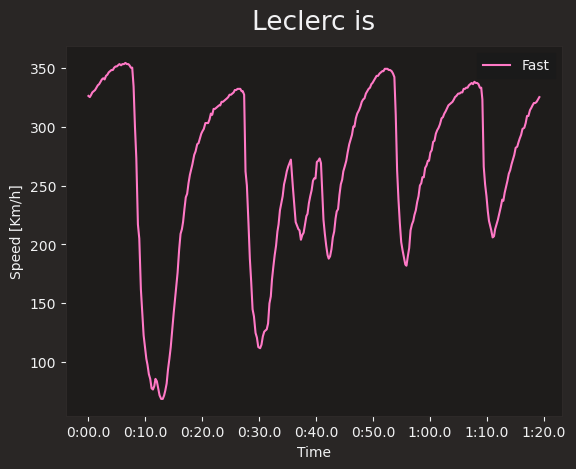

In [10]:
fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()